# NEW VERSION WITH CORE NODES

Enrico Borriello, enrico.borriello@asu.edu
Latest Update: Jun 19 20224

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# color palettes from coolors.co

colors = {'random':'#74D3AE',
           'random dark':'#2C8C67',
           'cellcollective':'#DD9787',
           'cellcollective dark':'#AF4831'
          }

In [14]:
def gaussian(mu, sigma, x):
    y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
    return y

In [2]:
#cc_data = pd.read_csv('240123_cell_collective_ck_and_isolated_fp_data.csv')
#rand_data = pd.read_csv('240123_random_ck_and_isolated_fp_data.csv')

cc_data = pd.read_csv('new_data/240216_cell_collective_ck_and_isolated_fp_data.csv')
iowa_data = pd.read_csv('new_data/240216_iowa_database_ck_and_isolated_fp_data.csv')
bio_data = pd.concat([cc_data, iowa_data], ignore_index=True)

rand_data = pd.read_csv('new_data/240216_random_ck_and_isolated_fp_data.csv')

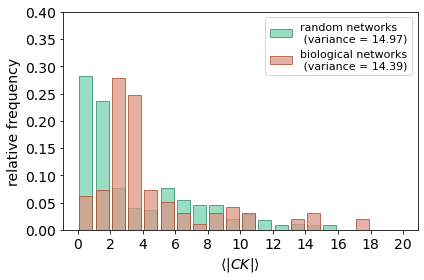

In [3]:
bio = bio_data['mean control kernel size']
rand = rand_data['mean control kernel size']

bins = np.linspace(0, 20, 21)
plt.ylim(0,.4)

plt.hist(rand, bins=bins,density=True,alpha=.75,
         label='random networks\n (variance = '+'{:.2f}'.format(np.var(rand))+')',
         color=colors['random'], edgecolor=colors['random dark'], rwidth=0.8)

plt.hist(bio,bins=bins,density=True,alpha=.75,
         label='biological networks\n (variance = '+'{:.2f}'.format(np.var(bio))+')',
         color=colors['cellcollective'], edgecolor=colors['cellcollective dark'], rwidth=0.8)

plt.xlabel(r'$ \langle|CK|\rangle $',size=14)
plt.ylabel('relative frequency',size=14)
plt.xticks([2*i for i in range(11) ],size=14)
plt.yticks(size=14)

plt.legend(fontsize=11)
plt.tight_layout()
plt.savefig('NEW_ck_dist.pdf')
plt.show()

# Simple scaling

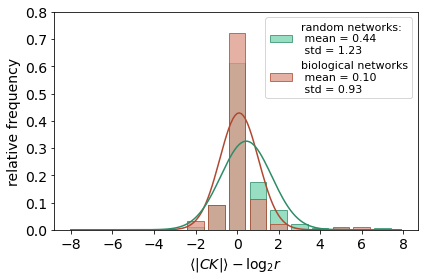

In [57]:
ck = bio_data['mean control kernel size']
r = bio_data['number of attractors']
bio = ck - np.log2(r)

ck = rand_data['mean control kernel size']
r = rand_data['number of attractors']
rand = ck - np.log2(r)

# Gaussian bio
mu_bio = np.mean(bio)
std_bio = np.std(bio)
x = np.arange(-8,8,.1)
y_bio = gaussian(mu_bio,std_bio,x)
plt.plot(x,y_bio,color=colors['cellcollective dark'])

# Gaussian rand
mu_rand = np.mean(rand)
std_rand = np.std(rand)
x = np.arange(-8,8,.1)
y_rand = gaussian(mu_rand,std_rand,x)
plt.plot(x,y_rand,color=colors['random dark'])

bins = np.linspace(-7.5, 7.5, 16)
plt.ylim(0,.8)

plt.hist(rand, bins=bins,density=True,alpha=.75,
         label='random networks:'+'\n mean = '+'{:.2f}'.format(mu_rand)+'\n std = '+'{:.2f}'.format(std_rand),
         color=colors['random'], edgecolor=colors['random dark'], rwidth=0.8)

plt.hist(bio,bins=bins,density=True,alpha=.75,
         label='biological networks'+'\n mean = '+'{:.2f}'.format(mu_bio)+'\n std = '+'{:.2f}'.format(std_bio),
         color=colors['cellcollective'], edgecolor=colors['cellcollective dark'], rwidth=0.8)

plt.xlabel(r'$ \langle|CK|\rangle - \log_2 r$',size =14)
plt.ylabel('relative frequency',size=14)
plt.xticks(size=14)
plt.yticks(size=14)

plt.legend(fontsize=11)
plt.tight_layout()
plt.savefig('NEW_ck_model1_dist.pdf')
plt.show()

In [35]:
print('mu_bio = '+str(np.mean(bio)))
print('std_bio = '+str(np.std(bio)))
print('')
print('mu_rand = '+str(np.mean(rand)))
print('std_rand = '+str(np.std(rand)))

mu_bio = 0.09854458101474405
std_bio = 0.9294673940595941

mu_rand = 0.442119242032073
std_rand = 1.2255795674197638


# Correction

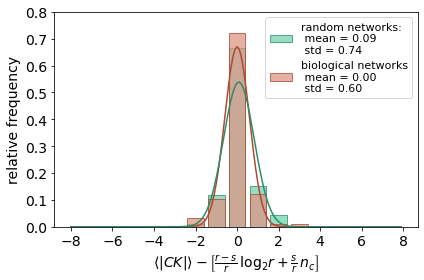

In [56]:
ck = bio_data['mean control kernel size']
r = bio_data['number of attractors']
s = bio_data['number of isolated fixed points'] 
#n = bio_data['size'] 
n = bio_data['number of core nodes']
bio = ck - ((r-s)/r)*np.log2(r) - (s/r)*n

ck = rand_data['mean control kernel size']
r = rand_data['number of attractors']
s = rand_data['number of isolated fixed points'] 
n = rand_data['size'] 
rand = ck - ((r-s)/r)*np.log2(r) - (s/r)*n

# Gaussian bio
mu_bio = np.mean(bio)
std_bio = np.std(bio)
x = np.arange(-8,8,.1)
y_bio = gaussian(mu_bio,std_bio,x)
plt.plot(x,y_bio,color=colors['cellcollective dark'])

# Gaussian rand
mu_rand = np.mean(rand)
std_rand = np.std(rand)
x = np.arange(-8,8,.1)
y_rand = gaussian(mu_rand,std_rand,x)
plt.plot(x,y_rand,color=colors['random dark'])

bins = np.linspace(-7.5, 7.5, 16)
plt.ylim(0,.8)

plt.hist(rand, bins=bins,density=True,alpha=.75,
         label='random networks:'+'\n mean = '+'{:.2f}'.format(mu_rand)+'\n std = '+'{:.2f}'.format(std_rand),
         color=colors['random'], edgecolor=colors['random dark'], rwidth=0.8)

plt.hist(bio,bins=bins,density=True,alpha=.75,
         label='biological networks'+'\n mean = '+'{:.2f}'.format(mu_bio)+'\n std = '+'{:.2f}'.format(std_bio),
         color=colors['cellcollective'], edgecolor=colors['cellcollective dark'], rwidth=0.8)

plt.xlabel(r'$ \langle|CK|\rangle - \left[\frac{r-s}{r}\,\log_2 r + \frac{s}{r}\,  n_c \right] $',size=14)
plt.ylabel('relative frequency',size=14)
plt.xticks(size=14)
plt.yticks(size=14)

plt.legend(fontsize=11)
plt.tight_layout()
plt.savefig('NEW_ck_model2_dist.pdf')
plt.show()

In [55]:
print('mu_bio = '+str(np.mean(bio)))
print('std_bio = '+str(np.std(bio)))
print('')
print('mu_rand = '+str(np.mean(rand)))
print('std_rand = '+str(np.std(rand)))

mu_bio = 0.0021195388374522796
std_bio = 0.5950592823341911

mu_rand = 0.08582649485783857
std_rand = 0.7402782296742157


In [21]:
print(len(rand_data))
print(len(cc_data))

371
44
